In [1]:
# importing necessary libraries :
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df = pd.read_csv("D:/Study/Excelr DS/Assignments/AS-6-Logistic/bank-full.csv", sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# About the dataset

1. age (numeric)

2. job : type of job 
   (categorical: "admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services") 
   
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4. education (categorical: "unknown","secondary","primary","tertiary")

5. default: has credit in default? (binary: "yes","no")

6. balance: average yearly balance, in euros (numeric) 

7. housing: has housing loan? (binary: "yes","no")

8. loan: has personal loan? (binary: "yes","no")
   (related with the last contact of the current campaign)
   
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 

10. day: last contact day of the month (numeric)

11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12. duration: last contact duration, in seconds (numeric)

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15. previous: number of contacts performed before this campaign and for this client (numeric)

16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# unique values for all the variables
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
balance: [ 2143    29     2 ...  8205 14204 16353]
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
day: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: [ 261  151   76 ... 1298 1246 1556]
campaign: [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 3

# Data Cleaning

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Variable : age:
age : age of the client

In [6]:
df.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [7]:
#converting age into categories :
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_cat"] = "20 to 30"
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_cat"] = "30 to 40"
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_cat"] = "40 to 50 "
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_cat"] = "50 to 60"
    column.loc[column["age"] >= 60, "age_cat"] = "60"
df['age_cat'] = df['age_cat']
#.astype(np.int64)

In [8]:
# Using DataFrame.insert() to add a column
df.insert(0, 'Age_cat',value=df['age_cat'])

In [9]:
df=df.drop(['age','age_cat'], axis=1)

## Variable : default :
default: has credit in default? (binary: "yes","no")

In [10]:
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [11]:
#defaut features does not play imp role
df.drop(['default'],axis=1, inplace=True)

## Variable : balance
balance: average yearly balance, in euros (numeric)

In [12]:
# remove outliers in feature balance...
df.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

As the balance is more, there are high chances that the client will buy the term deposit.

## Variable : day :
day: last contact day of the month (numeric)

In [13]:
df=df.drop(['day'],axis=1)

## Variable : month
month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

In [14]:
#converting month into numeric
df.replace({'month' : { "jan" : 1,"feb" : 2 , "mar":3, "apr" :4  ,  "may" :5 ,"jun" : 6, 
                       "jul" : 7, "aug" : 8, "sep" : 9,"oct" : 10, "nov" : 11 ,"dec" : 12}})

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,yes,no,unknown,5,261,1,-1,0,unknown,no
1,40 to 50,technician,single,secondary,29,yes,no,unknown,5,151,1,-1,0,unknown,no
2,30 to 40,entrepreneur,married,secondary,2,yes,yes,unknown,5,76,1,-1,0,unknown,no
3,40 to 50,blue-collar,married,unknown,1506,yes,no,unknown,5,92,1,-1,0,unknown,no
4,30 to 40,unknown,single,unknown,1,no,no,unknown,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,50 to 60,technician,married,tertiary,825,no,no,cellular,11,977,3,-1,0,unknown,yes
45207,60,retired,divorced,primary,1729,no,no,cellular,11,456,2,-1,0,unknown,yes
45208,60,retired,married,secondary,5715,no,no,cellular,11,1127,5,184,3,success,yes
45209,50 to 60,blue-collar,married,secondary,668,no,no,telephone,11,508,4,-1,0,unknown,no


## Variable : duration :
duration: last contact duration, in seconds (numeric)

In [15]:
# Convert duration to minutes of conversation.
decimal_points = 2
df['duration'] = df['duration'] / 60
df['duration'] = df['duration'].apply(lambda x: round(x, decimal_points))

In [16]:
df.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   0.00         3
     0.02         2
     0.03         3
     0.05         4
     0.07        15
                 ..
yes  51.57        1
     51.70        1
     53.05        1
     54.22        1
     64.68        1
Name: duration, Length: 2627, dtype: int64

<AxesSubplot:ylabel='duration'>

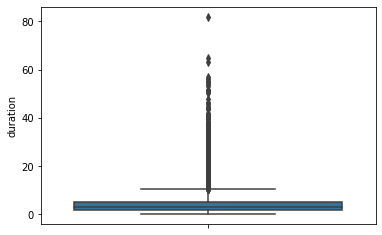

In [17]:
sns.boxplot(y="duration", data=df)

In [18]:
df.drop(df[df['duration']>3000].index,inplace=True,axis=0)

<AxesSubplot:ylabel='duration'>

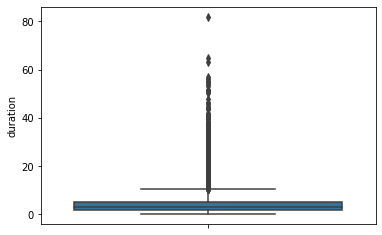

In [19]:
sns.boxplot(y="duration", data=df)

In [20]:
Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df = df[(df.duration>lower_limit)&(df.duration<upper_limit)]

<AxesSubplot:ylabel='duration'>

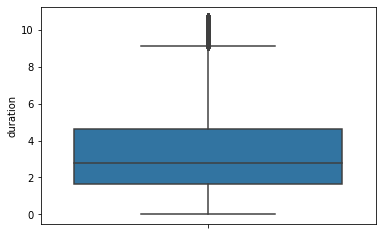

In [21]:
sns.boxplot(y="duration", data=df)

## Variable : pdays :
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

In [22]:
df.groupby(['y','pdays']).size()

y    pdays
no   -1       32193
      1           8
      2          34
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 883, dtype: int64

In [23]:
# drop pdays as it has -1 value for around 40%+ 
df.drop(['pdays'],axis=1, inplace=True)

##  Data after data cleaning :

In [24]:
df.head()

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,yes,no,unknown,may,4.35,1,0,unknown,no
1,40 to 50,technician,single,secondary,29,yes,no,unknown,may,2.52,1,0,unknown,no
2,30 to 40,entrepreneur,married,secondary,2,yes,yes,unknown,may,1.27,1,0,unknown,no
3,40 to 50,blue-collar,married,unknown,1506,yes,no,unknown,may,1.53,1,0,unknown,no
4,30 to 40,unknown,single,unknown,1,no,no,unknown,may,3.30,1,0,unknown,no


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41964 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_cat    41964 non-null  object 
 1   job        41964 non-null  object 
 2   marital    41964 non-null  object 
 3   education  41964 non-null  object 
 4   balance    41964 non-null  int64  
 5   housing    41964 non-null  object 
 6   loan       41964 non-null  object 
 7   contact    41964 non-null  object 
 8   month      41964 non-null  object 
 9   duration   41964 non-null  float64
 10  campaign   41964 non-null  int64  
 11  previous   41964 non-null  int64  
 12  poutcome   41964 non-null  object 
 13  y          41964 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.8+ MB


After the data cleaning the new shape of the data set is (41964, 14)
i.e. 13 features and one output variable with 41964 entries.

# Preprocessing

In [26]:
# converting the strings into integers using label encodding for the output variable
#create dict for binary encoding
dic = {"yes":1,"no":0}

label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
dic = {"yes":1,"no":0}
lst = ['y']
for i in lst:
    df[i] = df[i].map(dic)

In [27]:
df.head()

,Age_cat,job,marital,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,50 to 60,management,married,tertiary,2143,yes,no,unknown,may,4.35,1,0,unknown,0
1,40 to 50,technician,single,secondary,29,yes,no,unknown,may,2.52,1,0,unknown,0
2,30 to 40,entrepreneur,married,secondary,2,yes,yes,unknown,may,1.27,1,0,unknown,0
3,40 to 50,blue-collar,married,unknown,1506,yes,no,unknown,may,1.53,1,0,unknown,0
4,30 to 40,unknown,single,unknown,1,no,no,unknown,may,3.30,1,0,unknown,0


In [28]:
# Dividing our data into input and output variables 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [29]:
X = pd.get_dummies(data = X)

In [30]:
X.head()

,balance,duration,campaign,previous,Age_cat_20 to 30,Age_cat_30 to 40,Age_cat_40 to 50,Age_cat_50 to 60,Age_cat_60,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,4.35,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,29,2.52,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,1.27,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1506,1.53,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,3.30,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
x1 = X.copy()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x1 = scaler.fit_transform(x1)

# Applying Logistic Regression

In [33]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=50)

In [34]:
#Logistic regression and fit the model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(x_test)

In [36]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.68%


In [37]:
Classification_report = classification_report(y_test,y_pred)
print(Classification_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11457
           1       0.58      0.28      0.37      1133

    accuracy                           0.92     12590
   macro avg       0.76      0.63      0.66     12590
weighted avg       0.90      0.92      0.90     12590



AUC :  0.6281786126736133


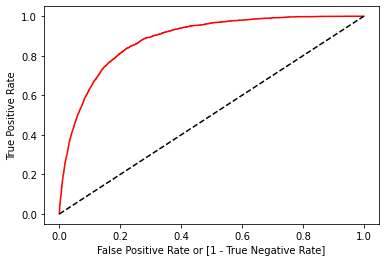

In [38]:
fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
print('AUC : ', auc)

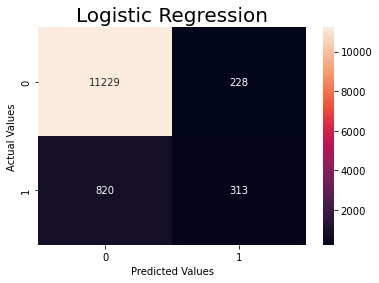

Accuracy :  91.67593328038124


In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy=accuracy_score(y_test, y_pred)

plt.title('Logistic Regression', size = 20)

# Adding figure labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
print('Accuracy : ', (accuracy*100))